# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [8]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

ad 4.
Pierwiastek nr 17.

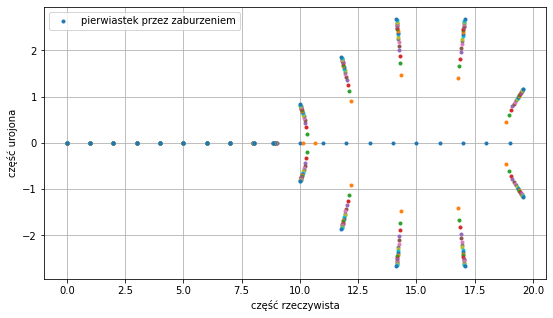

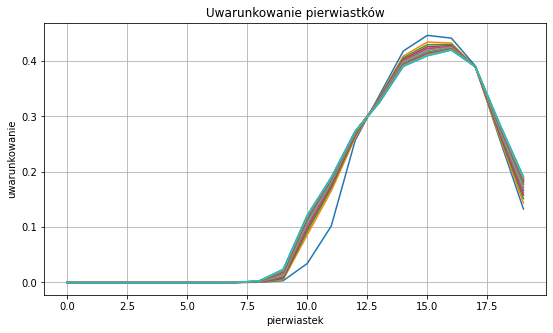

In [28]:
it = [i for i in range(20)]
roots = np.array(it)
polyroots = main.polly_A(roots)
cond = np.zeros((20, 20))

plt.figure(figsize=(9,5))
plt.plot(roots.real, roots.imag, '.', label='pierwiastek przez zaburzeniem')
plt.grid()
for i in range(20):
    cond_2 = []
    polyroots, roots_2 = main.roots_20(polyroots)
    plt.plot(roots_2.real, roots_2.imag, '.')
    error = roots_2 - roots
    for j in range(20):
        cond_2.append(np.linalg.norm(roots_2[j] - roots[j]) / np.linalg.norm(error))
    cond[i] = cond_2
plt.xlabel('część rzeczywista')
plt.ylabel('część urojona')
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for i in range(20):
    plt.plot(roots, cond[i])
plt.title('Uwarunkowanie pierwiastków')
plt.xlabel('pierwiastek')
plt.ylabel('uwarunkowanie')
plt.grid()
plt.show()

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

Macierz frobeniusa: 
 [[  0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.  -1.]]

Wartości własne: 
 [-4.69153788+0.j          0.2884918 +1.6889081j   0.2884918 -1.6889081j
  0.51507253+0.66306355j  0.51507253-0.66306355j  0.52161447+0.30995694j
  0.52161447-0.30995694j  0.52059013+0.09353964j  0.52059013-0.09353964j]

Macierz T: 
 [[-4.69153788e+00 -9.29392730e-01 -1.26194300e+01 -3.62081520e+00
  -1.39810433e+00 -8.96404714e+00  5.75835831e+00  3.14357808e+01
  -1.04825206e+02]
 [ 0.00000000e+00  2.88491804e-01  2.91474068e+00  7.35782993e-01
   2.84317230e-01  1.83583546e+00 -1.18162698e+00 -6.42990334e+00
   2.1444

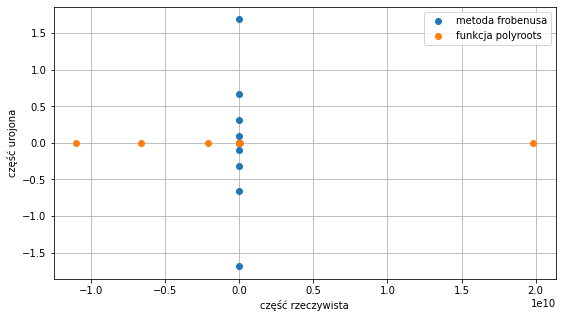

In [21]:
ones = np.ones(8)
polly = main.polly_A(ones)
frob, eigvals, schur, polys = main.frob_a(polly)

print('Macierz frobeniusa: \n', frob)
print('\nWartości własne: \n', eigvals)
print('\nMacierz T: \n', schur[0])
print('\nMacierz Z: \n', schur[1])

plt.figure(figsize=(9,5))
plt.plot(eigvals.real, eigvals.imag, 'o', label='metoda frobenusa')
plt.plot(polys.real, polys.imag, 'o', label='funkcja polyroots')
plt.grid()
plt.legend()
plt.xlabel('część rzeczywista')
plt.ylabel('część urojona')
plt.show()

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


Macierz frobeniusa: 
 [[   0.    1.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    1.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    1.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    1.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    1.]
 [ -16.   72.   28. -558.  990. -783.  486. -243.]]

Wartości własne: 
 [-2.44996812e+02+0.j          6.97095244e-04+1.41143048j
  6.97095244e-04-1.41143048j -3.33333779e-01+0.j
  6.89904445e-01+0.05736542j  6.89904445e-01-0.05736542j
  6.15596992e-01+0.j          3.33345371e-01+0.j        ]

Macierz T: 
 [[-2.44996812e+02 -4.25534958e+02 -8.61381193e-02  2.48191771e+01
   8.44200993e+01 -1.25790994e+02 -4.58539737e+02 -1.31569715e+03]
 [ 0.00000000e+00  6.97095244e-04 -9.93974086e-01 -1.03515130e-01
   2.61774013e-02  1.92025402e-02 -1.47115851e-02  5.93764832e-03]
 [ 0.00000000e+00  2.00421321e+00  6.97095244e-0

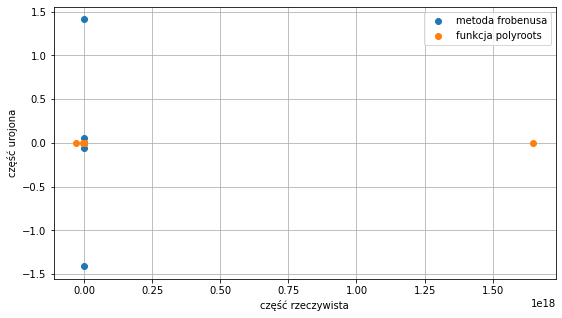

In [20]:
poly = np.array([16, -72, -28, 558, -990, 783, -486, 243])
frob, eigvals, schur, polys = main.frob_a(poly)

print('Macierz frobeniusa: \n', frob)
print('\nWartości własne: \n', eigvals)
print('\nMacierz T: \n', schur[0])
print('\nMacierz Z: \n', schur[1])

plt.figure(figsize=(9,5))
plt.plot(eigvals.real, eigvals.imag, 'o', label='metoda frobenusa')
plt.plot(polys.real, polys.imag, 'o', label='funkcja polyroots')
plt.grid()
plt.legend()
plt.xlabel('część rzeczywista')
plt.ylabel('część urojona')
plt.show()

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [5]:
poly = np.array([-624, 4, 780, -5, -156, 1])
roots = np.polynomial.chebyshev.chebroots(poly)

print('Pierwiastki z funkcji chebroots: \n', roots)

Pierwiastki z funkcji chebroots: 
 [-1.11961499 -1.          1.          1.11640934 78.00320566]


Wnioski: 
Zapoznałem się z numerycznymi metodami rozwiązywania równań nieliniowych, czyli metodami znajdowania miejsc zerowych funkcji. Zbadałem odporność pierwiastków na zaburzenia oraz ich uwarunkowanie. Poznałem sposób wyznaczania miejsc zerowych wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa